# 监督学习算法:  k近邻(knn),线性回归,朴素贝叶斯,决策树,支持向量机, 神经网络,逻辑回归

In [17]:
#导入相关模块
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
%matplotlib inline

#忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')  
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## 1.k近邻

### 判断肿瘤是良性人体肿瘤还是恶性肿瘤,benign表示良性,malignant表示恶性肿瘤

#### 数据探索

In [94]:
#数据肿瘤读取
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data,columns=cancer.feature_names)
print(X.shape)
X.head(2)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,...,25.38000,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890
1,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,...,24.99000,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902


In [11]:
#标签数据,malignant表示恶性, benign表示良性
y = pd.DataFrame(cancer.target,columns=["target"])
print(cancer.target_names)
y.head(2)

['malignant' 'benign']


,target
0,0
1,0


In [13]:
#标签数据分布,较均衡, 无需处理
y["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

In [97]:
#数据标准化
#X = X.apply(lambda x: (x-x.mean())/x.std()) 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_X = scaler.fit(X).transform(X)
scaler_X #查看经标准化后的数据

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### 构建模型

In [15]:
#数据集切分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =0)

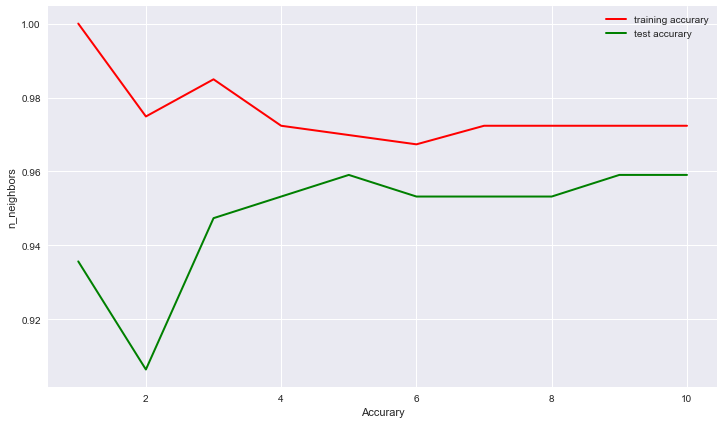

In [22]:
#精度
#训练集精度
training_accuracy=[]
#测试集精度
test_accuracy=[]
###############################################################################
#n_nigighbors取值从1到10
from sklearn.neighbors import KNeighborsClassifier
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #模型训练
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #记录训练集精度
    training_accuracy.append(clf.score(X_train,y_train))
    #记录泛化精度
    test_accuracy.append(clf.score(X_test,y_test))
    
##############################################################################
#模型可视化
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
plt.plot(neighbors_settings,training_accuracy,label="training accurary",lw=2,color="r")
plt.plot(neighbors_settings,test_accuracy,label="test accurary",lw=2,color="g")
plt.xlabel("Accurary")
plt.ylabel("n_neighbors")
plt.legend()

## 2.线性回归---岭回归模型和Lasso回归

##### 均方误差(mean squared error)是预测值与真实值之差除以样本数
##### 正则化是指对模型做显示约束(通过alpha参数控制),避免过拟合, 岭回归正是利用L2正则化

#### 岭回归模型是通过控制系数防止过拟合, Lasso是通过筛选变量防止过拟合

### 岭回归---预测波士顿房价

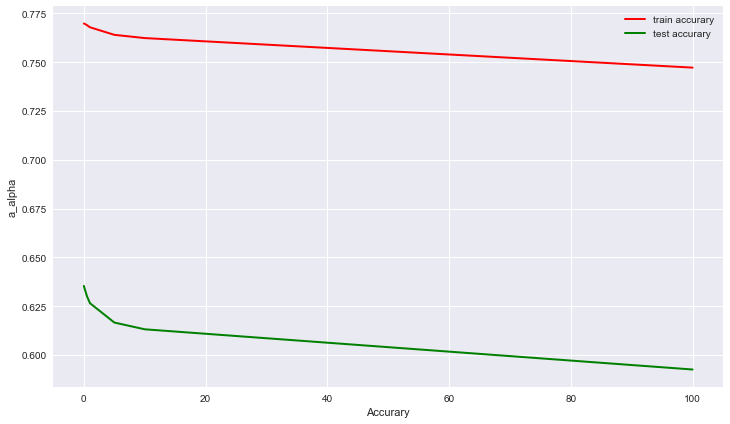

In [37]:
#预测波士顿房价
#导入数据
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=["target"])
#数据集切分
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
#构建岭回归模型
train_accurary=[]
test_accurary=[]
a_alpha = [0.00001,0.005,0.01,0.05,0.1,0.5,1,5,10,100] 
for a in a_alpha:
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha=a).fit(x_train,y_train) #通过调节alpha参数做显示约束
    train_accurary.append(ridge.score(x_train,y_train))
    test_accurary.append(ridge.score(x_test,y_test))
    
##############################################################################
#精度可视化
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
plt.plot(a_alpha,train_accurary,label="train accurary",lw=2,color="r")
plt.plot(a_alpha,test_accurary,label="test accurary",lw=2,color="g")
plt.xlabel("Accurary")
plt.ylabel("a_alpha")
plt.legend()

### lasso 回归模型

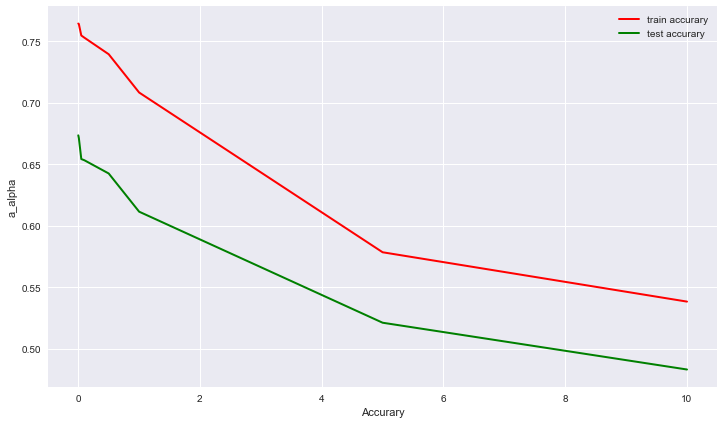

In [36]:
#预测波士顿房价
#导入数据
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=["target"])
#数据集切分
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#构建岭回归模型
train_accurary=[]
test_accurary=[]
a_alpha = [0.0001,0.005,0.01,0.05,0.1,0.5,1,5,10] 
for a in a_alpha:
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha=a).fit(x_train,y_train) #通过调节alpha参数做显示约束
    train_accurary.append(lasso.score(x_train,y_train))
    test_accurary.append(lasso.score(x_test,y_test))
    
##############################################################################
#精度可视化
plt.figure(figsize=(12,7))
sns.set(style="darkgrid")
plt.plot(a_alpha,train_accurary,label="train accurary",lw=2,color="r")
plt.plot(a_alpha,test_accurary,label="test accurary",lw=2,color="g")
plt.xlabel("Accurary")
plt.ylabel("a_alpha")
plt.legend()

## 3.逻辑回归(logistics)and线性支持向量机(线性SVM)

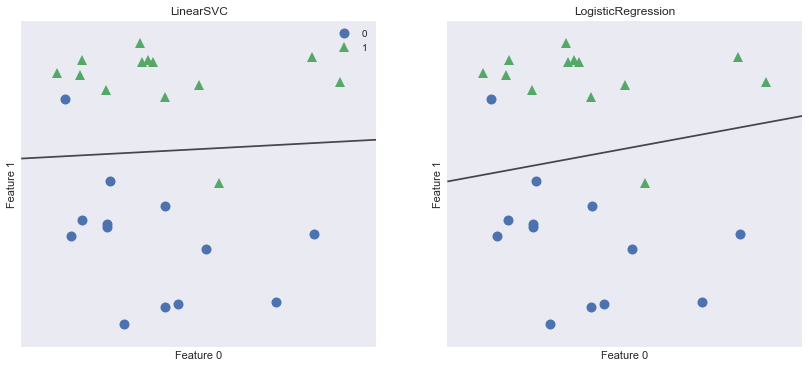

In [39]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
from sklearn.svm import LinearSVC #导入线性支持向量机模型

X, y = mglearn.datasets.make_forge() #导入数据

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y) #训练模型
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7) #可视化模型结果
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

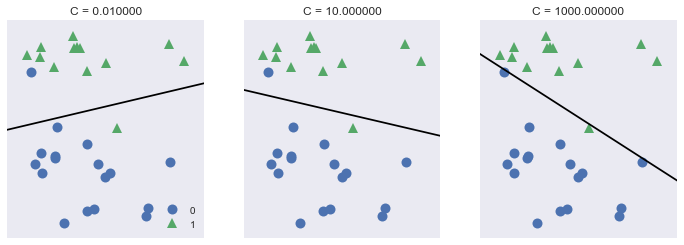

In [40]:
# 对于逻辑回归和线性支持向量机,决定正则化强度的权衡参数C,C值越大, 对正则化越弱.
#不同参数C下的线性SVM在数据集上的决策边界
mglearn.plots.plot_linear_svc_regularization()

#### 用于多分类的线性SVM

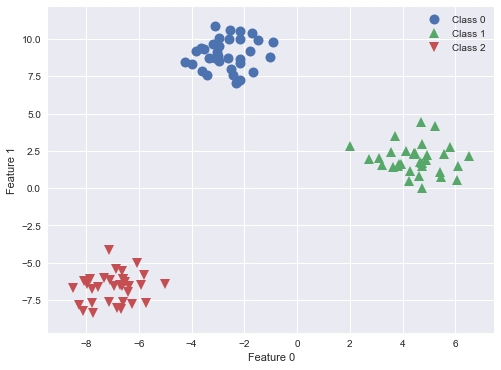

In [43]:
#读取数据并对数据分布可视化
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
plt.figure(figsize=(8,6))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [45]:
#构建模型
from sklearn.svm import LinearSVC #导入模型
line_svm = LinearSVC(penalty="l2",C=0.1)
liner_svm = line_svm.fit(X,y)

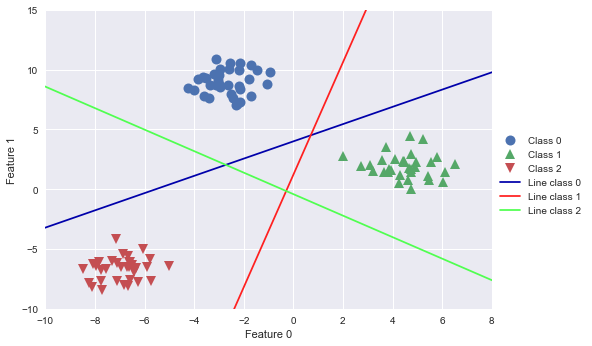

In [47]:
#模型可视化
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(liner_svm.coef_, liner_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

## 4.朴素贝叶斯分类器

#### scikit-learn中实现三种朴素贝叶斯分类器: GaussianNB,BernoulliNB和MultionmialNB

In [48]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # 对每个类别进行遍历
    # 统计每个特征中出现1的个数
    counts[label] = X[y == label].sum(axis=0)
print("特征统计:\n{}".format(counts))

特征统计:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 5. 决策树

In [59]:
#决策树
from sklearn.tree import DecisionTreeClassifier #导入决策树模型
from sklearn.datasets import load_breast_cancer #导入数据

#肿瘤数据读取
cancer = load_breast_cancer() 

#数据集切分
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#构建模型
tree = DecisionTreeClassifier(max_depth=3,random_state=0) #构建模型,参数max_depth是调节模型深度
tree.fit(X_train, y_train) #模型训练
print("训练集准确度: {:.3f}".format(tree.score(X_train, y_train)))
print("测试集准确度: {:.3f}".format(tree.score(X_test, y_test)))
#发生了过拟合

训练集准确度: 0.977
测试集准确度: 0.944


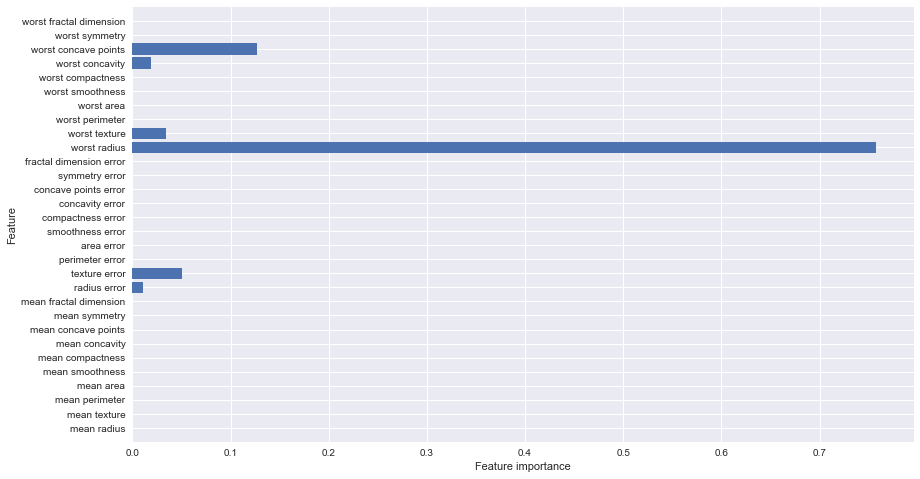

In [62]:
#决策树特征重要性
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(14,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

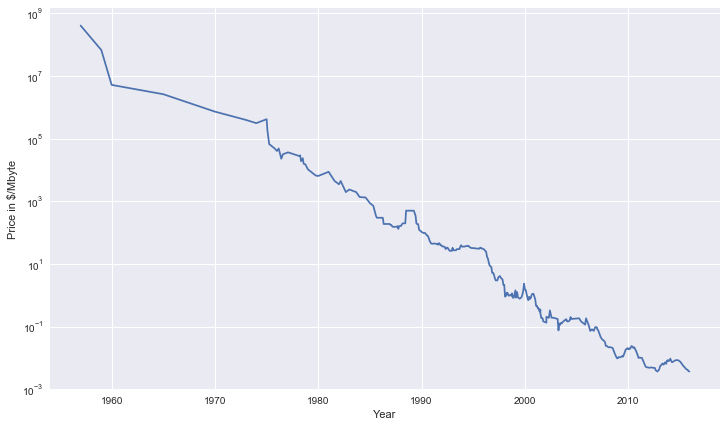

In [69]:
#预测计算机内存价格
import os
ram_prices = pd.read_csv("ram_price.csv")
plt.figure(figsize=(12,7))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 利用历史数据预测2000年后的计算机内存价格
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 基于日期来预测价格
X_train = data_train.date[:, np.newaxis]
# 利用对数变换得到数据和目标之间更简单的关系
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 对所有数据进行预测
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 对数变换逆运算
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

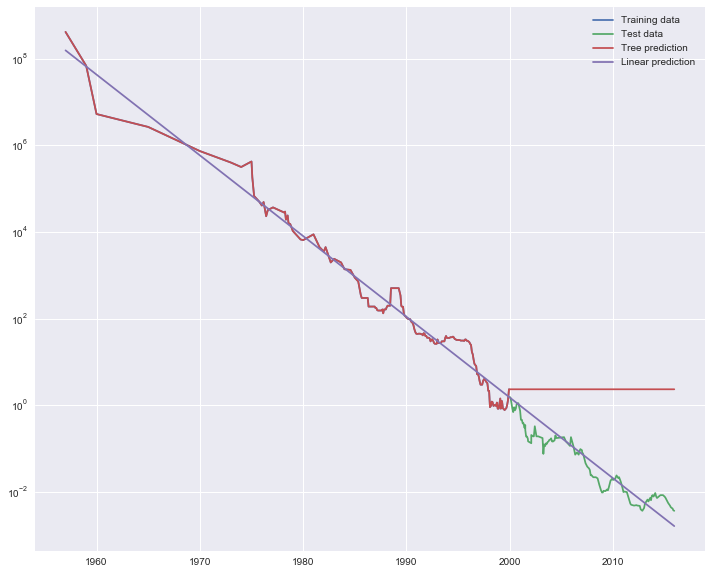

In [73]:
#模型可视化
plt.figure(figsize=(12,10))
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

## 6 随机森林

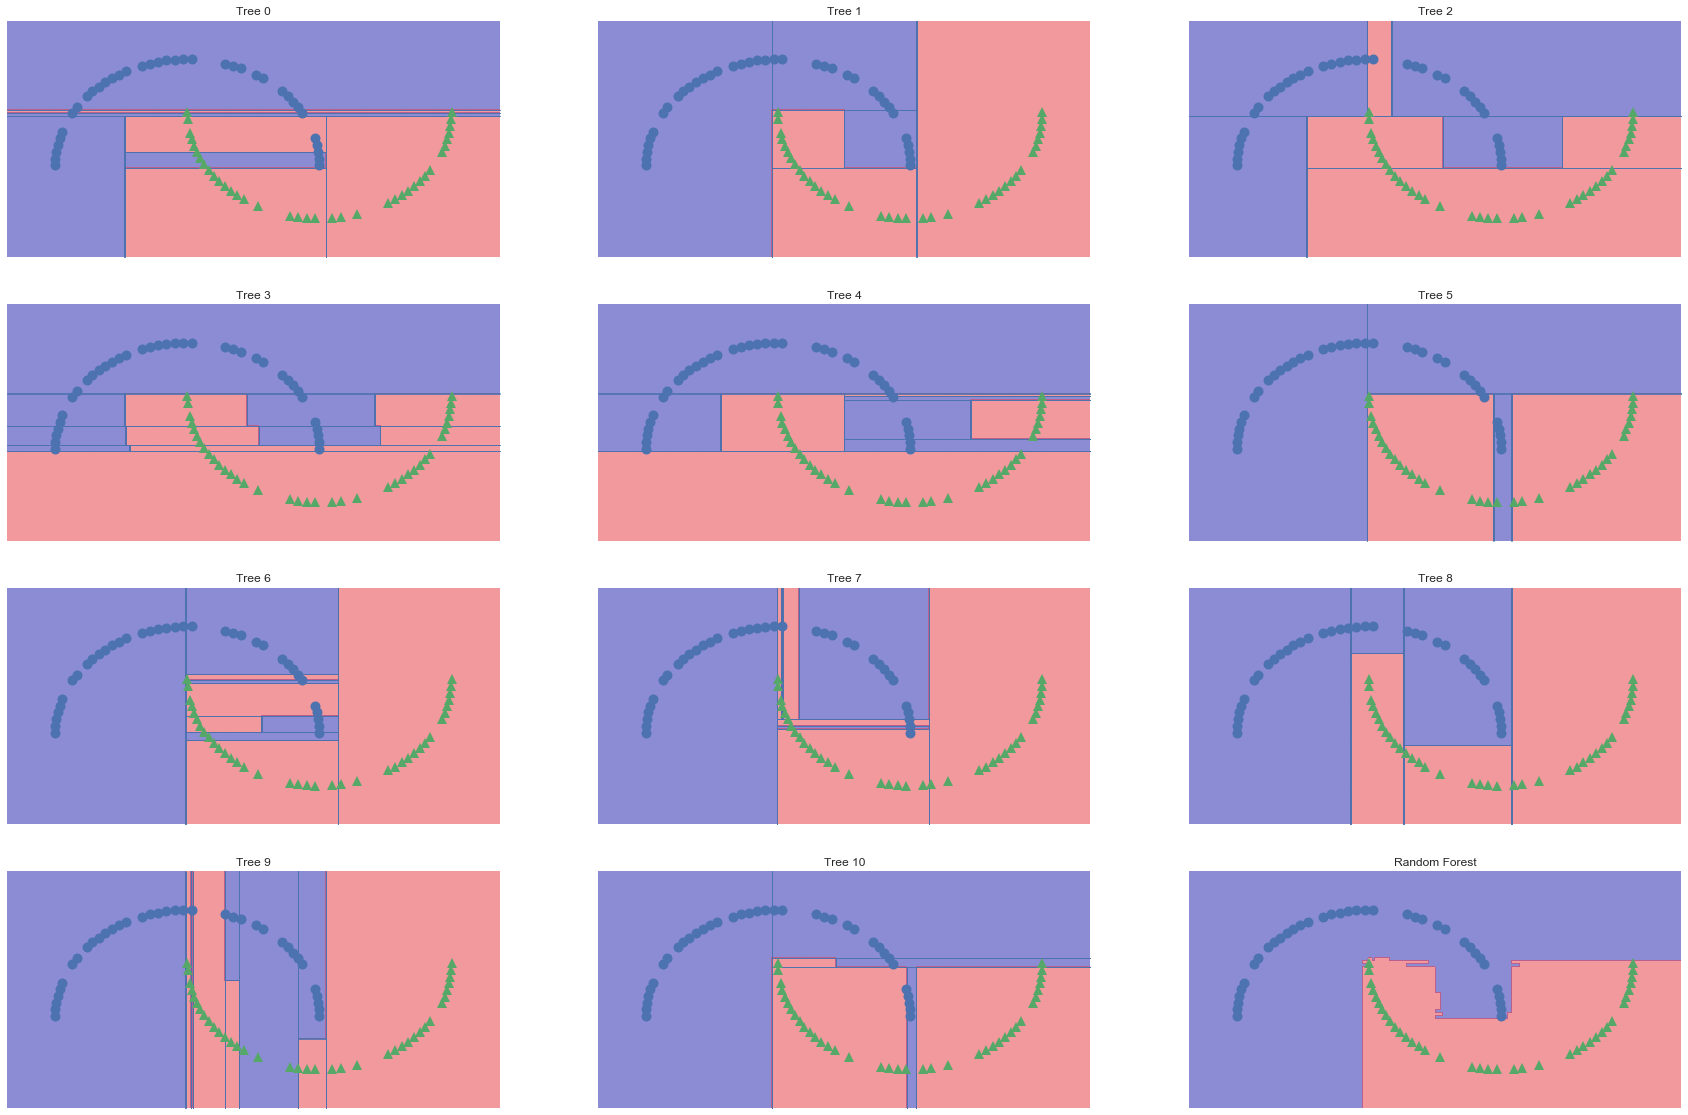

In [77]:
from sklearn.ensemble import RandomForestClassifier #随机森林模型
from sklearn.datasets import make_moons
#数据集读取及切分
X, y = make_moons()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)
#构建模型
forest = RandomForestClassifier(n_estimators=11, random_state=2) #参数n_estimators控制森林的颗树
forest.fit(X_train, y_train)
#可视化
fig, axes = plt.subplots(4, 3, figsize=(30, 20))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

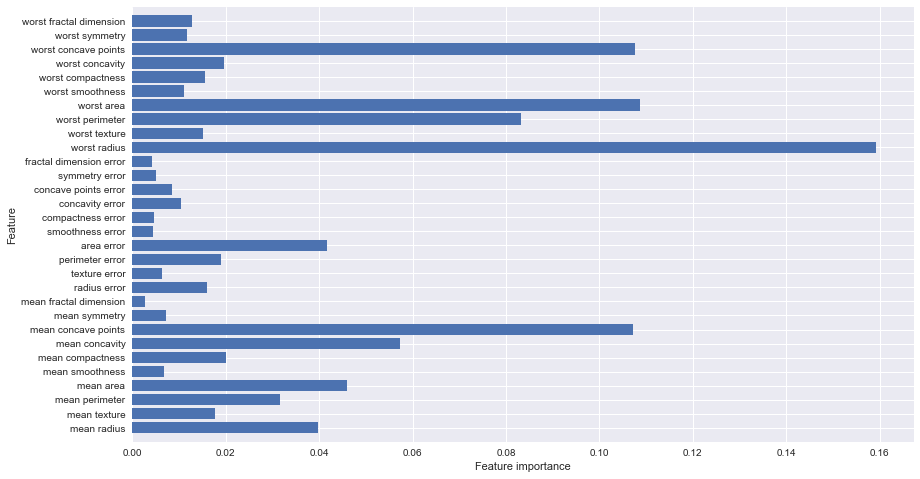

In [82]:
#特征权重
from sklearn.ensemble import RandomForestClassifier #随机森林模型
from sklearn.datasets import load_breast_cancer
#数据集读取及切分
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)
#构建模型
forest = RandomForestClassifier(n_estimators=100, random_state=2) #参数n_estimators控制森林的颗树
forest.fit(X_train, y_train)

plot_feature_importances_cancer(forest)

## 7. 支持向量机

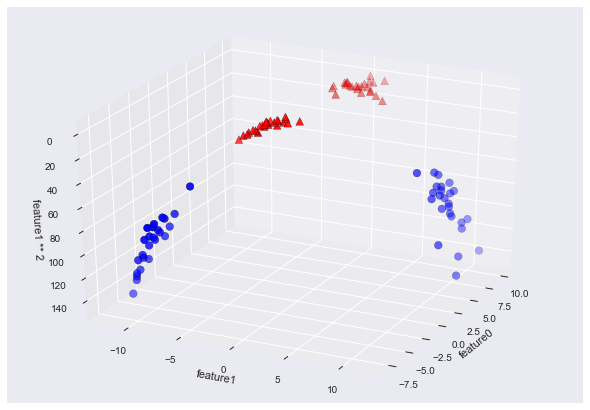

In [83]:
#导入数据
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4,random_state=8)
y=y%2
# 增加新特征
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 三维数据可视化
ax = Axes3D(figure, elev=-152, azim=-26)
#先画出所有y==0的点,然后画出所有y==1的点
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

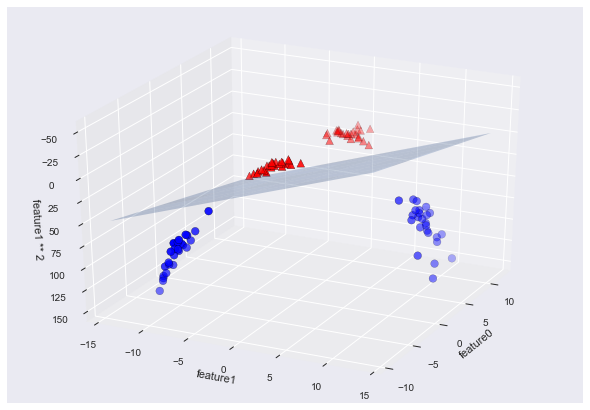

In [84]:
#构建模型
from sklearn.svm import LinearSVC
linear_svm_3d = LinearSVC().fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 显示香型决策边界
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

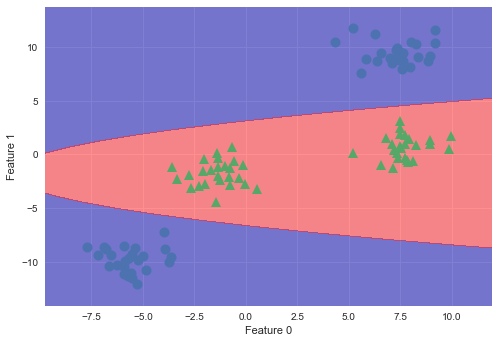

In [85]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 8.神经网络(深度学习)

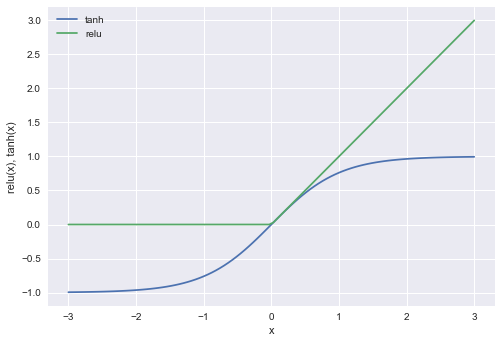

In [86]:
#模型原型
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

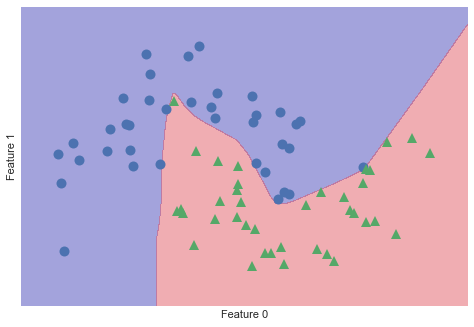

In [87]:
from sklearn.neural_network import MLPClassifier #导入神经网络模块
from sklearn.datasets import make_moons #导入数据

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) #数据读取
#数据切分
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
#构建神经网络模型
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train) #默认一个隐含层100个隐节点
#模型可视化
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

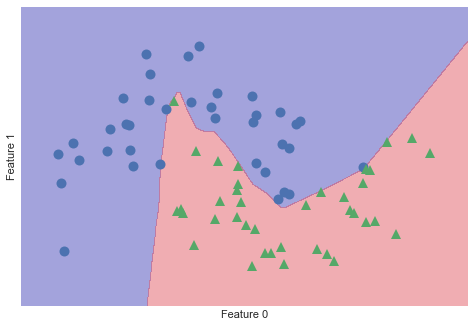

In [89]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100,100,100,100]) #使用4个隐层100个隐含点
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

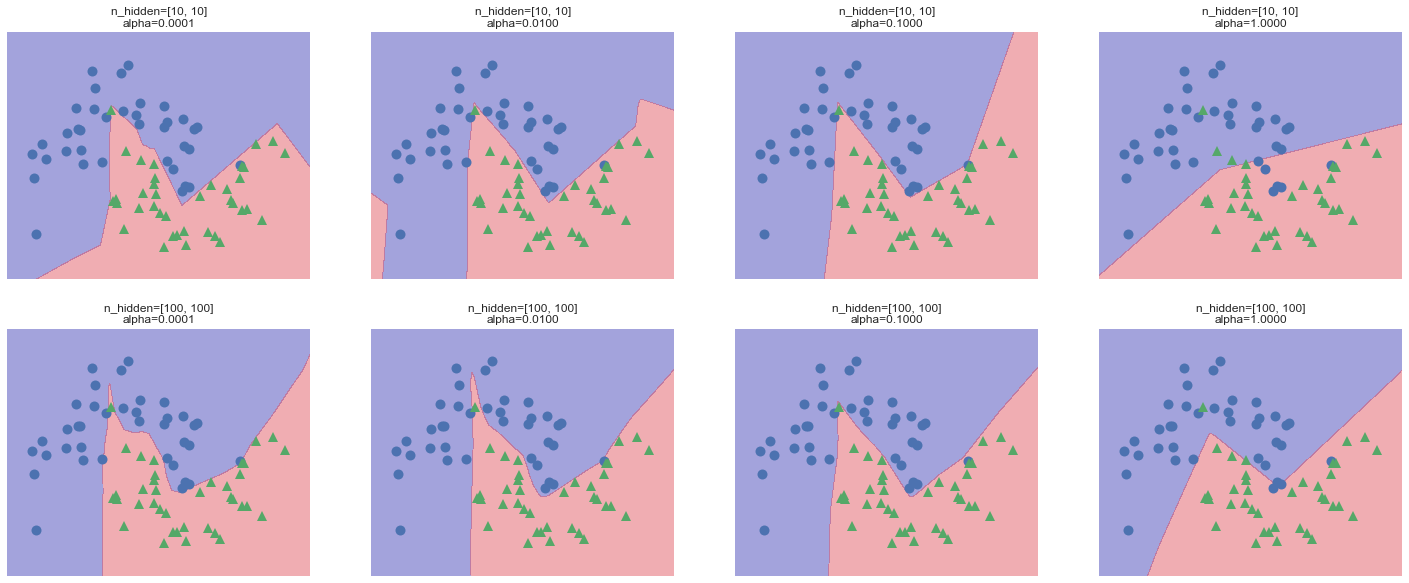

In [91]:
#不同隐藏层不同隐点对比
fig, axes = plt.subplots(2, 4, figsize=(25, 10))
for axx, n_hidden_nodes in zip(axes, [10, 100]):#隐藏层
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):#alpha表示学习率
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

## 9. 总结
#### knn模型适用于小型数据,是很好的基准模型, 很好解释
#### 线性模型适用于大型数据,也适用于高维数据
#### 朴素贝叶斯只适用于分类问题, 使用大数据和高维数据,精度比线性模型低,但速度快
#### 决策树速度快,且不需要缩放数据, 可以可视化, 很容易理解
#### 随机森林几乎总比单颗树好, 但不适用高纬稀疏数据,不好解释
#### 支持向量机, 需要数据缩放,对参数敏感
#### 神经网络 特别适用于复杂的模型, 需要数据缩放, 对参数选取敏感